# Predicting-prospective-subsciber-base-of-bank-deposits-with-Linear-Regression-Model-Machine-Leaning

Taking the raw data of the tele-calling and client details..., predicting prospective subsciber base for bank deposits using Linear Regression Model of Machine Learning with python programming.

The files training.csv, testing.csv are attached in the Repository

Algorithms used are Logistic Regression, Decision Tree Classifier

In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [2]:
#data set to train the model
train=pd.read_csv('training.csv')

In [3]:
#data set for testing the model
test=pd.read_csv('testing.csv')

In [4]:
train['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

In [5]:
train.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

In [6]:
temp=train.drop(['ID','age','balance','day','duration','campaign','pdays','previous'],axis=1)
temp=pd.get_dummies(train)
train=train.drop(['job','marital','education','default','housing','loan','contact','month','poutcome','subscribed'],axis=1)
train=pd.merge(train,temp)

In [7]:
train.head()

,ID,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,subscribed_no,subscribed_yes
0,26110,56,1933,19,44,2,-1,0,1,0,...,0,1,0,0,0,0,0,1,1,0
1,40576,31,3,20,91,2,-1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,15320,27,891,18,240,1,-1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,43962,57,3287,22,867,1,84,3,0,0,...,0,0,0,0,0,0,1,0,0,1
4,29842,31,119,4,380,1,-1,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [8]:
train=train.drop(['subscribed_no'],axis=1)

In [9]:
train.shape

(31647, 53)

In [10]:
test.shape

(13564, 17)

In [11]:
temp2=test.drop(['ID','age','balance','day','duration','campaign','pdays','previous'],axis=1)
temp2=pd.get_dummies(test)
test=test.drop(['job','marital','education','default','housing','loan','contact','month','poutcome'],axis=1)
test=pd.merge(test,temp2)

Univariate Analysis

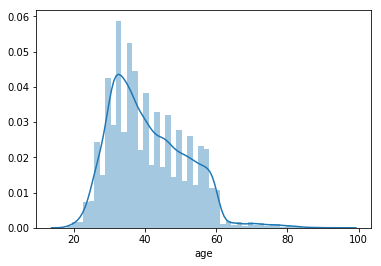

In [12]:
sn.distplot(train["age"])    

In [13]:
test['subscribed_yes']=0
test.columns

Index(['ID', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays',
       'previous', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown', 'subscribed_yes'],
      dtype='object')

Bivariate Analysis

subscribed_yes      0     1
default_yes                
0               27388  3674
1                 544    41


Text(0, 0.5, 'Percentage')

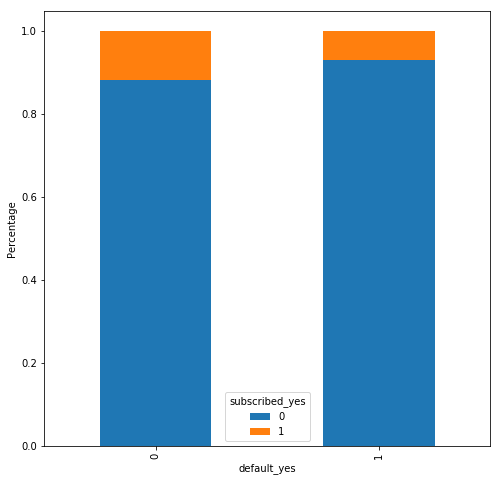

In [14]:
print(pd.crosstab(train['default_yes'],train['subscribed_yes']))          

default=pd.crosstab(train['default_yes'],train['subscribed_yes'])
default.div(default.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('default_yes')
plt.ylabel('Percentage')

In [15]:
target= train['subscribed_yes']
train = train.drop('subscribed_yes',1)

In [16]:
test = test.drop('subscribed_yes',1)

# Logistic Regression

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_val, y_train, y_val = train_test_split(train, target, test_size = 0.3, random_state=10)

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
lreg = LogisticRegression()

In [21]:
lreg.fit(X_train,y_train)

C:\Users\MOHIT CHVK\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
prediction = lreg.predict(X_val)

In [24]:
accuracy_score(y_val, prediction)

0.9083728278041074


# Decision Tree Classifier

In [25]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(criterion='entropy',random_state=100,max_depth=6,min_samples_leaf=5)
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [26]:
y_pred=clf.predict(X_val)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(y_val, y_pred)

0.9127962085308057

In [28]:
predict = clf.predict(X_val)

In [29]:
accuracy_score(y_val, predict)

0.9127962085308057

In [30]:
test_prediction = clf.predict(test)

In [31]:
submission = pd.DataFrame()

In [32]:
submission['ID'] = test['ID']
submission['subscribed'] = test_prediction

In [33]:
submission['subscribed'].replace(0,'no',inplace=True)
submission['subscribed'].replace(1,'yes',inplace=True)

In [34]:
submission.to_csv('submission.csv', header=True, index=False)